In [1]:
import sys
sys.path.append('../')
sys.path.append('../get_branch/linear')
sys.path.append('../get_branch/cnn')
sys.path.append('../get_branch/max_pooling')
sys.path.append('../model_json/make_json_program/cnn')

import json
import numpy as np
import matplotlib.pyplot as plt

import make_vgg16_json
import linear_input_branch
import linear_hidden_branch
import linear_output_branch
import cnn_input_branch
import cnn_hidden_branch
import cnn_output_branch
import max_pooling_branch

In [2]:
#画像は正方形を仮定
IMG_SIZE = 224

In [3]:
make_vgg16_json.make_json()

In [4]:
json_file = open('../model_json/json/vgg16.json', 'r')
json_value  = json.load(json_file)
json_value

{'layer0': {'input_channels': 3,
  'out_channels': 64,
  'kernel_size': 3,
  'layer_type': 'input',
  'processing_type': 'cnn',
  'skip_connection_flag': False},
 'layer1': {'input_channels': 64,
  'out_channels': 64,
  'kernel_size': 3,
  'layer_type': 'hidden',
  'processing_type': 'cnn',
  'skip_connection_flag': False},
 'layer2': {'input_channels': 64,
  'out_channels': 64,
  'stride': 2,
  'layer_type': 'hidden',
  'processing_type': 'max_pooling',
  'skip_connection_flag': False},
 'layer3': {'input_channels': 64,
  'out_channels': 128,
  'kernel_size': 3,
  'layer_type': 'hidden',
  'processing_type': 'cnn',
  'skip_connection_flag': False},
 'layer4': {'input_channels': 128,
  'out_channels': 128,
  'kernel_size': 3,
  'layer_type': 'hidden',
  'processing_type': 'cnn',
  'skip_connection_flag': False},
 'layer5': {'input_channels': 128,
  'out_channels': 128,
  'stride': 2,
  'layer_type': 'hidden',
  'processing_type': 'max_pooling',
  'skip_connection_flag': False},
 'layer

In [5]:
#dictからlistを作成（最初からlistを作成したほうが楽だったかも）
branch_list = np.empty(0)

for i in range(len(json_value)):
    layer_json_value = json_value["layer" + str(i)]
    
    #input層
    if layer_json_value["layer_type"] == "input":
        if layer_json_value["processing_type"] == "linear":
            branch_list = np.append(branch_list,linear_input_branch.get_branch(layer_json_value))
            
        elif layer_json_value["processing_type"] == "cnn":
            branch_list = np.append(branch_list,cnn_input_branch.get_branch(layer_json_value,IMG_SIZE))
            #print(cnn_input_branch.get_branch(layer_json_value,IMG_SIZE))
            #print(len(cnn_input_branch.get_branch(layer_json_value,IMG_SIZE)))
            #print("##########################")
            
    #hidden層
    if layer_json_value["layer_type"] == "hidden":
        if layer_json_value["processing_type"] == "linear":
            branch_list = np.append(branch_list,linear_hidden_branch.get_branch(layer_json_value))
            #print(linear_hidden_branch.get_branch(layer_json_value))
            #print(len(linear_hidden_branch.get_branch(layer_json_value)))
            #print("##########################")
        elif layer_json_value["processing_type"] == "cnn":
            branch_list = np.append(branch_list,cnn_hidden_branch.get_branch(layer_json_value,IMG_SIZE))
            #print(cnn_hidden_branch.get_branch(layer_json_value,IMG_SIZE))
            #print(len(cnn_hidden_branch.get_branch(layer_json_value,IMG_SIZE)))
            #print("##########################")
        elif layer_json_value["processing_type"] == "max_pooling":
            one_layer_branch_list, IMG_SIZE = max_pooling_branch.get_branch(layer_json_value,IMG_SIZE) 
            branch_list = np.append(branch_list,one_layer_branch_list)
            #print(one_layer_branch_list)
            #print(len(one_layer_branch_list))
            #print(IMG_SIZE)
            #print("##########################")
            
    #output層      
    if layer_json_value["layer_type"] == "output":
        if layer_json_value["processing_type"] == "linear":
            branch_list = np.append(branch_list,linear_output_branch.get_branch(layer_json_value))
            #print(linear_output_branch.get_branch(layer_json_value))
            #print(len(linear_output_branch.get_branch(layer_json_value)))
            #print("##########################")
        elif layer_json_value["processing_type"] == "cnn":
            branch_list = np.append(branch_list,cnn_output_branch.get_branch(layer_json_value,IMG_SIZE))
            
branch_list

array([ 576.,  576.,  576., ..., 1000., 1000., 1000.])

In [6]:
IMG_SIZE

7

(array([6121472., 3361792., 2412544.,       0., 2007040.,       0.,
              0.,       0.,   29184., 1304576.]),
 array([1.0000e+00, 4.6170e+02, 9.2240e+02, 1.3831e+03, 1.8438e+03,
        2.3045e+03, 2.7652e+03, 3.2259e+03, 3.6866e+03, 4.1473e+03,
        4.6080e+03]),
 <a list of 10 Patch objects>)

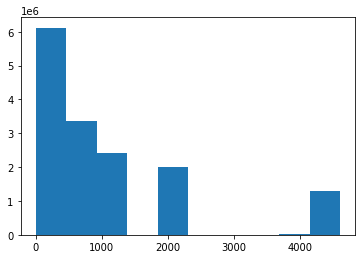

In [7]:
plt.hist(branch_list)